In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00502/
data=pd.read_excel("online_retail_II.xlsx")

In [3]:
data.shape

(525461, 8)

In [4]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [5]:
data.StockCode.value_counts()

85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
21170        1
21148        1
21113        1
21104        1
85086B       1
Name: StockCode, Length: 4632, dtype: int64

In [6]:
data.Quantity.value_counts()

 1      146118
 2       78131
 12      60682
 6       44431
 3       35517
         ...  
-193         1
-194         1
 151         1
 317         1
-512         1
Name: Quantity, Length: 825, dtype: int64

In [7]:
data["Customer ID"].value_counts()

14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
15997.0       1
18174.0       1
15913.0       1
13128.0       1
15233.0       1
Name: Customer ID, Length: 4383, dtype: int64

In [8]:
data["Country"].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

In [9]:
# 500k orders, 4k items, 4k customers.


In [74]:
from sklearn.preprocessing import OneHotEncoder
#create instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

country_onehot = pd.DataFrame(encoder.fit_transform(data[['Country']]), columns=encoder.categories_)
encoder.categories_
#merge one-hot encoded columns back with original DataFrame
data_augmented = data.join(country_onehot)
data_augmented

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,"(Australia,)","(Austria,)",...,"(Singapore,)","(Spain,)","(Sweden,)","(Switzerland,)","(Thailand,)","(USA,)","(United Arab Emirates,)","(United Kingdom,)","(Unspecified,)","(West Indies,)"
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# So there are 4000 products and 4000 customers.  Why be afraid?
from sklearn.preprocessing import OneHotEncoder

def onehot(column):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    onehot = pd.DataFrame(encoder.fit_transform(column.values.reshape(-1,1)),columns=encoder.categories_)
    return(onehot)

a = onehot(data["Customer ID"])
# First time this didn't work because of null values.



In [79]:
onehot(data.Country)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
417530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
417531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
417532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<2102x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2102 stored elements in Compressed Sparse Row format>

In [59]:
# Take a 3000-row subset for testing!
datasample= data.loc[0:3000,:]

In [80]:
onehot(datasample.Country)



,Australia,Belgium,EIRE,France,Germany,Portugal,USA,United Kingdom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
onehot(datasample["Customer ID"])

,12362.0,12490.0,12533.0,12615.0,12636.0,12682.0,12758.0,12836.0,12913.0,12921.0,...,17742.0,17804.0,17865.0,17961.0,17984.0,17998.0,18037.0,18087.0,18102.0,18287.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
onehot(datasample["StockCode"])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [86]:
datasample["StockCode"] = datasample.StockCode.apply(str)

<ipython-input-86-4b6652bf06d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasample["StockCode"] = datasample.StockCode.apply(str)


In [87]:
onehot(datasample["StockCode"])

,10002,10120,10133,10135,15034,15036,15056BL,15056N,15056P,16047,...,90200A,90200B,90200C,90200D,90200E,90209A,90209C,90214H,D,POST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
SC = onehot(datasample["StockCode"])
ID = onehot(datasample["Customer ID"])
CT = onehot(data.Country)
Q =datasample[["Quantity", "Price"]]

In [41]:
data.dropna(inplace=True)

In [102]:
X = Q.join(CT).join(ID).join(SC)


0          0
1          0
2          0
3          0
4          0
        ... 
2996    1112
2997    1112
2998    1112
2999    1112
3000    1112
Length: 2102, dtype: int64

In [130]:
CT.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
X.isnull().sum(axis=0)

Quantity          0
Price             0
(Australia,)      0
(Austria,)        0
(Bahrain,)        0
               ... 
(90209A,)       286
(90209C,)       286
(90214H,)       286
(D,)            286
(POST,)         286
Length: 1151, dtype: int64

In [127]:
X.isnull().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
        ... 
2996    1112
2997    1112
2998    1112
2999    1112
3000    1112
Length: 2102, dtype: int64

In [128]:
X.shape

(2102, 1151)

In [104]:
# Oh, something's wrong with the join.

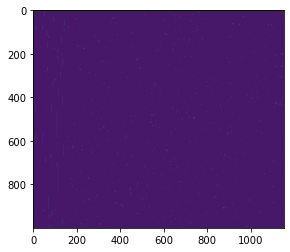

In [115]:
plt.imshow(Xscaled[0:1000,:]*100)

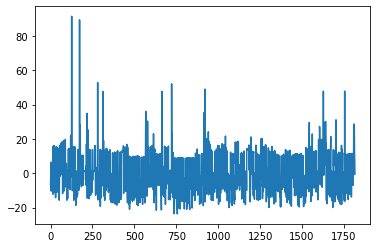

In [118]:
plt.plot(np.sum(Xscaled, axis=1))

In [ ]:
# The rows have different contents...

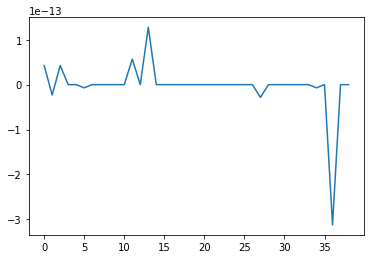

In [119]:
plt.plot(np.sum(Xscaled, axis=0))

In [ ]:
# This, 10^{-13}, is near the floating-point limits for single-precision numbers.
# So the columns have had their means subtracted and the differences are
# floating-point-rounding errors here.

(nan, nan)

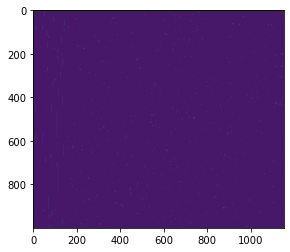

In [125]:
plt.imshow(Xscaled[0:1000,:])
np.max(Xscaled), np.min(Xscaled)

In [137]:
# Try customer and 
SC = onehot(datasample["StockCode"])
ID = onehot(datasample["Customer ID"])
X = SC.join(ID)

In [138]:
X.isnull().sum(axis=0)

10002      0
10120      0
10133      0
10135      0
15034      0
          ..
17998.0    0
18037.0    0
18087.0    0
18102.0    0
18287.0    0
Length: 1112, dtype: int64

In [139]:
X.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2097    0
2098    0
2099    0
2100    0
2101    0
Length: 2102, dtype: int64

In [ ]:
# Looks good... kind of?

(45.836666545463366, -0.2567545927388543)

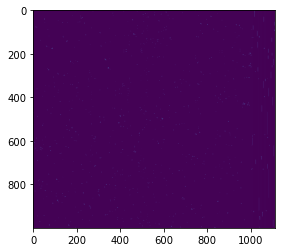

In [141]:
plt.imshow(Xscaled[0:1000,:])
np.max(Xscaled), np.min(Xscaled)

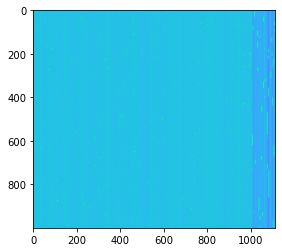

In [147]:
plt.imshow(np.log(0.3+Xscaled[0:1000,:]), cmap="turbo")


In [ ]:
# Finally, a heatmap that suggests there is data there.

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler().fit(X)
Xscaled = StandardScaler().fit_transform(X)
svdreg = TruncatedSVD( 50).fit(Xscaled)

In [ ]:
from sklearn.cluster import KMeans

In [152]:
krange = range(2,20,2)
fits = []
for k in krange:
    print(k)
    kmeans =KMeans( n_clusters=k).fit(X)
    fits.append(kmeans)

In [153]:
# Now, have a bunch of clusterings.. how to do anything with them?
fits[4]

KMeans(n_clusters=10)

In [157]:
from collections import Counter
Counter(fits[4].labels_)

Counter({0: 1423,
         3: 104,
         7: 50,
         5: 130,
         2: 59,
         8: 59,
         4: 83,
         1: 65,
         9: 50,
         6: 79})

In [158]:
Counter(fits[0].labels_)

Counter({0: 1972, 1: 130})

In [159]:
Counter(fits[1].labels_)

Counter({0: 1813, 1: 104, 2: 130, 3: 55})

In [166]:
dir(fits[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 '

In [12]:
# Although it requires looking at the documentation, inertia_ is what we want here.
# This is the sum of the squares of the differences between data points and
# their assigned medioids.


In [167]:
goodnessoffit = [ fit.inertia_ for fit in fits]

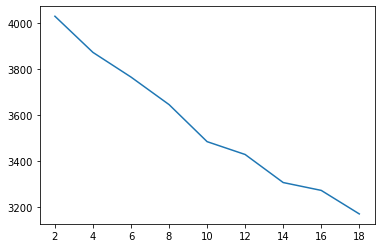

In [169]:
plt.plot(krange, goodnessoffit)

In [14]:
# I am prepared to believe there are a large number of legitimate clusters.

In [170]:
krange = range(2,200,2)
fits = []
for k in krange:
    print(k)
    kmeans =KMeans( n_clusters=k).fit(X)
    fits.append(kmeans)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88


KeyboardInterrupt: 

In [171]:
goodnessoffit = [ fit.inertia_ for fit in fits]

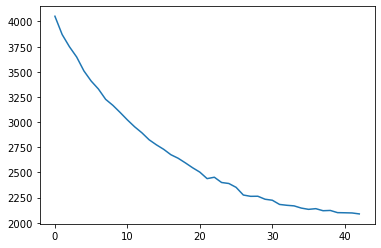

In [172]:
plt.plot(goodnessoffit)

In [ ]:
# The fit just keeps getting better with k, as expected

In [173]:
Xscaled.shape

(2102, 1112)

In [179]:
# Each k chooses 1112 (!!!) degrees of freedom.  YiKeS! 
krange = np.array(krange[0:len(goodnessoffit)])

In [182]:
# k=1 has zero dof because of the scaler.
dof = np.array([(k-1) * 1112 for k in krange])
goodnessoffit=np.array(goodnessoffit)

In [183]:
# Let's see... AIC = 2 k - 2 ln LIKE 
#    BIC = k log N - 2 log LIKE 
AIC = 2 * dof - 2* np.log(goodnessoffit)

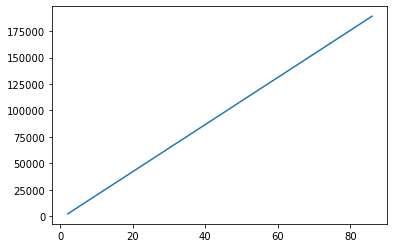

In [184]:
plt.plot(krange, AIC)
# You can't see the likelihood term in the shadow of the 2 * 1112 * k term;
# the complexity penalty completely dominates.

# Plotting BIC is pointless at this point, instead of 2 dof it has the even larger
# term ln N dof.
# That would suggest k=1, dof = 0.

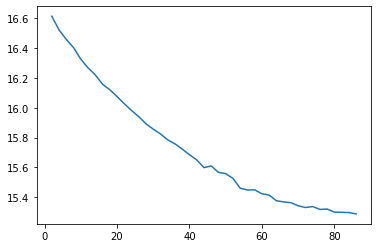

In [186]:
plt.plot(krange,  2* np.log(goodnessoffit))

In [187]:
svdreg

TruncatedSVD(n_components=50)

In [189]:
Zscaled = svdreg.transform(Xscaled)

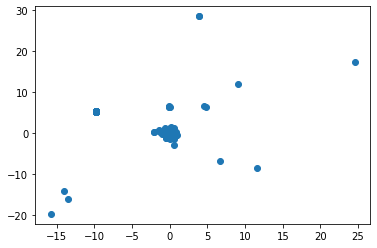

In [191]:
plt.plot(Zscaled[:,0], Zscaled[:,1], 'o')

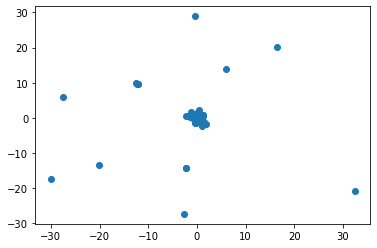

In [192]:
plt.plot(Zscaled[:,2], Zscaled[:,3], 'o')

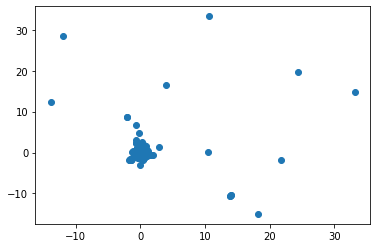

In [193]:
plt.plot(Zscaled[:,4], Zscaled[:,5], 'o')

In [194]:
dir(svdreg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'algorithm',
 'components_',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'n_components',
 'n_features_in_',
 'n_iter',
 'random_state',
 'set_params',
 'singular_values_',
 'tol',
 'transform']

Text(0.5, 0, 'Component number')

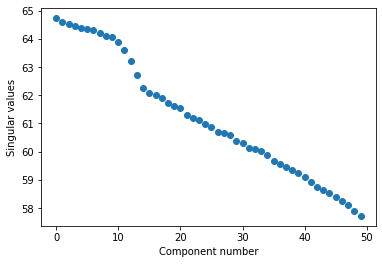

In [197]:
plt.plot(svdreg.singular_values_, 'o')
plt.ylabel("Singular values")
plt.xlabel("Component number")

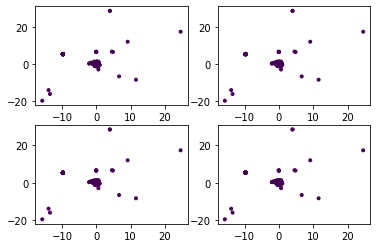

In [205]:
plt.subplot(221)
plt.scatter(Zscaled[:,0], Zscaled[:,1], marker="." ,c=fits[0].labels_, )
plt.subplot(222)
plt.scatter(Zscaled[:,0], Zscaled[:,1], marker=".", c=fits[1].labels_)
plt.subplot(223)
plt.scatter(Zscaled[:,0], Zscaled[:,1], marker=".", c=fits[2].labels_)
plt.subplot(224)
plt.scatter(Zscaled[:,0], Zscaled[:,1], marker=".", c=fits[3].labels_)

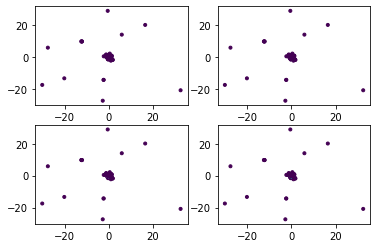

In [206]:
plt.subplot(221)
plt.scatter(Zscaled[:,2], Zscaled[:,3], marker="." ,c=fits[0].labels_ )
plt.subplot(222)
plt.scatter(Zscaled[:,2], Zscaled[:,3], marker=".", c=fits[1].labels_)
plt.subplot(223)
plt.scatter(Zscaled[:,2], Zscaled[:,3], marker=".", c=fits[2].labels_)
plt.subplot(224)
plt.scatter(Zscaled[:,2], Zscaled[:,3], marker=".", c=fits[3].labels_)

In [207]:
# Don't see anything on these handful of outliers on PC2 and PC3 either.
Counter(fits[1].labels_)

Counter({0: 1814, 1: 104, 3: 130, 2: 54})

In [229]:
labels2=fits[0].labels_

In [232]:
type(labels2), labels2.shape

(numpy.ndarray, (2102,))

In [233]:
X.shape


(2102, 1114)

In [236]:
labels2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [220]:
X["k2"]

TypeError: only integer scalar arrays can be converted to a scalar index